,r1-0/0,r1-0/1,r2-0/0,r2-0/1,r3-0/0,r3-0/1,r4-0/0,r4-0/1,d-1/0/0-0/1-0/0,h-1/0/0-0/1-0/0,d-0/1/0-0/1-0/0,d-2/0/4-0/1-0/0,d-1/1/4-0/1-0/0,d-0/2/4-0/1-0/0,d-1/0/0-0/0-0/1,d-0/1/0-0/0-0/1,d-2/0/4-0/0-0/1,d-1/1/4-0/0-0/1,d-0/2/4-0/0-0/1
1/0/0-0/0,2,0,1,0,1,0,0,0,1,1,0,0,0,0,-1,0,0,0,0
1/0/0-0/1,0,2,0,1,0,1,0,0,-1,-1,0,0,0,0,1,0,0,0,0
0/1/0-0/0,0,0,1,0,1,0,2,0,0,0,1,0,0,0,0,-1,0,0,0
0/1/0-0/1,0,0,0,1,0,1,0,2,0,0,-1,0,0,0,0,1,0,0,0
2/0/4-0/0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,0,0
2/0/4-0/1,0,-1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,1,0,0
1/1/4-0/0,0,0,-1,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,-1,0
1/1/4-0/1,0,0,0,-1,0,-1,0,0,0,0,0,0,-1,0,0,0,0,1,0
0/2/4-0/0,0,0,0,0,0,0,-1,0,0,0,0,0,0,1,0,0,0,0,-1
0/2/4-0/1,0,0,0,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,0,1


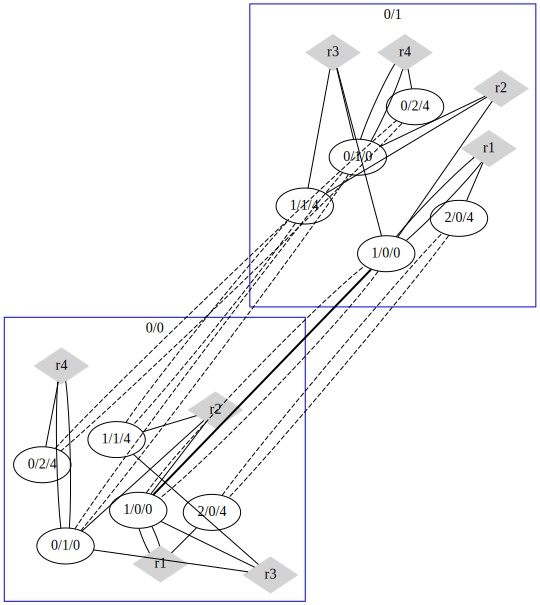

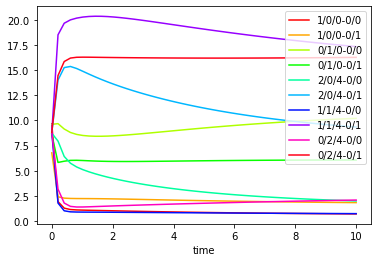

[9.66486024 6.77715002 9.61355971 8.60606454 8.7347463  8.80778431
 8.80714285 8.80648133 8.80714285 8.80647687 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


SystemExit: 

C:\Users\arizona95\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
import os
import gym
import neat
from evaluator import Evaluator
from tf_neat.recurrent_net import RecurrentNet

param = {
    "c_v":3,
    "s_v":2,
    "max_state":5,
}

def make_env():
    return gym.make("CartPole-v0")


def make_net(genome, config, bs):
    return RecurrentNet.create(genome, config, bs)

def run(n_generations):
    config_path = os.path.join(os.path.dirname(os.path.abspath('')), "lab/neat.cfg")
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )

    evaluator = Evaluator(
        make_net, make_env=make_env, param=param
    )

    def eval_genomes(genomes, config):
        for _, genome in genomes:
            genome.fitness = evaluator.eval_genome(genome, config)

    pop = neat.Population(config)
    pop.run(eval_genomes, n_generations)

run(1)